# AegisLens: Explainable Phishing Detector
Part 1: Data Acquisition and EDA

---

## 1. Project Setup and Library Imports
 In this section, we import the essential libraries for our data science workflow.
- pandas: For data manipulation and analysis.
- os: For interacting with the operating system (e.g., creating directories).
- kaggle: To download our dataset directly from the Kaggle platform.

In [20]:
import pandas as pd
import os
import kaggle

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Acquisition from Kaggle
Here, we will download the "Phishing Websites Dataset" from Kaggle.
The dataset we'll use is from Shashwat Tiwari (shashwatwork/phishing-dataset-for-machine-learning).

[Kaggle dataset](https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning)

[Source dataset](https://data.mendeley.com/datasets/h3cgnj8hft/1)

In [21]:
# Define the dataset path and the local directory to store it
dataset_path = 'shashwatwork/phishing-dataset-for-machine-learning'
data_dir = 'data'
file_name = 'phishing_dataset_ml_full.csv'
file_path = os.path.join(data_dir, file_name)

# Create the data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# Check if the dataset already exists, if not, download it
if not os.path.exists(file_path):
    print("Dataset not found locally. Downloading from Kaggle...")
    # Use the Kaggle API to download the dataset
    # Note: Ensure your kaggle.json API key is set up correctly in ~/.kaggle/ or ~/.config
    try:
        kaggle.api.dataset_download_files(dataset_path, path=data_dir, unzip=True)
        print("Dataset downloaded and unzipped successfully.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
        print("Please ensure your Kaggle API credentials are correctly configured.")
else:
    print("Dataset already exists locally.")

Dataset already exists locally.


## 3. Load Dataset and Initial Exploration
Perform our initial Exploratory Data Analysis (EDA) to understand its structure.

In [22]:
# Load the CSV file into a DataFrame
try:
    # display() function is specific to Jupyter environments and is great for rich output.
    df = pd.read_csv(file_path)
    print("\nDataset loaded successfully. Here's a preview:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the download step.")


Dataset loaded successfully. Here's a preview:


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


## 4. Initial Exploratory Data Analysis (EDA)
Quick health check on our data.

In [23]:
# Concise summary of the DataFrame.
# This will show us column names, non-null counts, and data types.
print("\n--- DataFrame Info ---")
df.info()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents

In [24]:
# Get descriptive statistics for the numerical columns.
# Understand the scale and distribution of our features.
print("\n--- Descriptive Statistics ---")
display(df.describe())


--- Descriptive Statistics ---


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Check for any missing values across the entire dataset.
# This is a direct check.
missing_values = df.isnull().sum().sum()
print(f"\nTotal number of missing values in the dataset: {missing_values}")

if missing_values == 0:
    print("Our dataset is clean with no missing values.")


Total number of missing values in the dataset: 0
Our dataset is clean with no missing values.


In [26]:
# Check the balance of our target variable ('CLASS_LABEL').
# 1 indicates a phishing URL, 0 indicates a legitimate URL in this dataset.
# A balanced dataset is crucial for training an unbiased model.
print("\n--- Target Variable Distribution ---")
if 'CLASS_LABEL' in df.columns:
    print(df['CLASS_LABEL'].value_counts())
else:
    print("Warning: 'Result' column not found. Please check the dataset columns.")


--- Target Variable Distribution ---
CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


## Part 2: Data Preparation and Baseline Model Training
The Predictive Core
---

## 5. Data Preparation for Modeling
Before we can train our models, we need to separate our dataset into features (the inputs, X) and the target variable (the output we want to predict, y).

In [27]:
# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Drop id column to prevent the model from learning
# irrelevant patterns.
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("Dropped 'id' column.")

# Define our features (X) and target (y)
# x contains all columns EXCEPT for 'CLASS_LABEL'.
x = df.drop('CLASS_LABEL', axis=1)

# y contains ONLY the 'CLASS_LABEL' column.
y = df['CLASS_LABEL']

# Display the shapes of our feature matrix and target vector to confirm.
print(f"\nShape of our features (x): {x.shape}")
print(f"Shape of our target (y): {y.shape}")

Dropped 'id' column.

Shape of our features (x): (10000, 48)
Shape of our target (y): (10000,)


## 6. Splitting the Data
Split our data into a training set and a testing set.
The model will learn from the training set.
The testing set will be held back as "unseen" data to evaluate the model's performance.
- test_size=0.2 means we'll use 20% of the data for testing.
- stratify=y ensures that the proportion of phishing vs. legitimate URLs is the same in both the training and testing sets, which is crucial for a balanced evaluation.
- random_state=42 ensures that we get the same split every time we run the code, which makes our results reproducible.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\nData split into training and testing sets:")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


Data split into training and testing sets:
x_train shape: (8000, 48)
x_test shape: (2000, 48)


## 7. Baseline Model Training and Evaluation
We'll start with two simple but effective baseline models to establish a performance benchmark.

In [29]:
# Store results in a dictionary to create a comparison table.
model_performance = {}

### Model 1: Logistic Regression

In [30]:
# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression ---")
start_time = time.time()

# Initialize the model
# Increased max_iter to ensure the model converges with our number of features.
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg.predict(x_test)

# Calculate training time
end_time = time.time()
lr_time = end_time - start_time

# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Store the results
model_performance['Logistic Regression'] = [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_time]

print(f"Training Time: {lr_time:.2f} seconds")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")


--- Training Logistic Regression ---
Training Time: 0.99 seconds
Accuracy: 0.9510
Precision: 0.9457
Recall: 0.9570
F1-Score: 0.9513


/home/ddf/Documents/projects/aegis_lens/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 2: Decision Tree Classifier

In [31]:
# --- Model 2: Decision Tree ---
print("\n--- Training Decision Tree ---")
start_time = time.time()

# Initialize the model
dec_tree = DecisionTreeClassifier(random_state=42)

# Train the model
dec_tree.fit(x_train, y_train)

# Make predictions
y_pred_dt = dec_tree.predict(x_test)

# Calculate training time
end_time = time.time()
dt_time = end_time - start_time

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Store the results
model_performance['Decision Tree'] = [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_time]

print(f"Training Time: {dt_time:.2f} seconds")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

# Results so far
print("\n--- Model Performance So Far ---")
performance_df = pd.DataFrame.from_dict(
    model_performance,
    orient='index',
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
)
display(performance_df)



--- Training Decision Tree ---
Training Time: 0.09 seconds
Accuracy: 0.9640
Precision: 0.9612
Recall: 0.9670
F1-Score: 0.9641

--- Model Performance So Far ---


,Accuracy,Precision,Recall,F1-Score,Training Time (s)
Logistic Regression,0.951,0.945652,0.957,0.951292,0.993925
Decision Tree,0.964,0.961233,0.967,0.964108,0.088750


## 8. Ensemble Model Training and Evaluation
Now we'll train our more powerful ensemble models. These models combine the predictions of many individual decision trees to produce a more robust result.

In [32]:
# Import the ensemble model classes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Model 3: Random Forest Clasifier

In [33]:
# --- Model 3: Random Forest ---
print("\n--- Training Random Forest ---")
start_time = time.time()

# Initialize the model
# n_estimators=100 means it will build 100 decision trees.
# n_jobs=-1 tells scikit-learn to use all available CPU cores for training.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_clf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(x_test)

# Calculate training time
end_time = time.time()
rf_time = end_time - start_time

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Store the results
model_performance['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_time]

print(f"Training Time: {rf_time:.2f} seconds")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")


--- Training Random Forest ---
Training Time: 0.40 seconds
Accuracy: 0.9855
Precision: 0.9860
Recall: 0.9850
F1-Score: 0.9855


### Model 4: Gradient Boost Classifier

In [34]:
# --- Model 4: Gradient Boosting ---
print("\n--- Training Gradient Boosting ---")
start_time = time.time()

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(x_test)

# Calculate training time
end_time = time.time()
gb_time = end_time - start_time

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Store the results
model_performance['Gradient Boosting'] = [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_time]

print(f"Training Time: {gb_time:.2f} seconds")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")


--- Training Gradient Boosting ---
Training Time: 1.51 seconds
Accuracy: 0.9790
Precision: 0.9809
Recall: 0.9770
F1-Score: 0.9790


## 9. Final Model Comparison and Selection
View the performance of all models together to make our final choice.

In [35]:
print("\n--- Final Model Performance Comparison ---")
performance_df = pd.DataFrame.from_dict(
    model_performance,
    orient='index',
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
)
display(performance_df)


--- Final Model Performance Comparison ---


,Accuracy,Precision,Recall,F1-Score,Training Time (s)
Logistic Regression,0.9510,0.945652,0.957,0.951292,0.993925
Decision Tree,0.9640,0.961233,0.967,0.964108,0.088750
Random Forest,0.9855,0.985986,0.985,0.985493,0.402720
Gradient Boosting,0.9790,0.980924,0.977,0.978958,1.508873


### Visualizaations of Model Performance

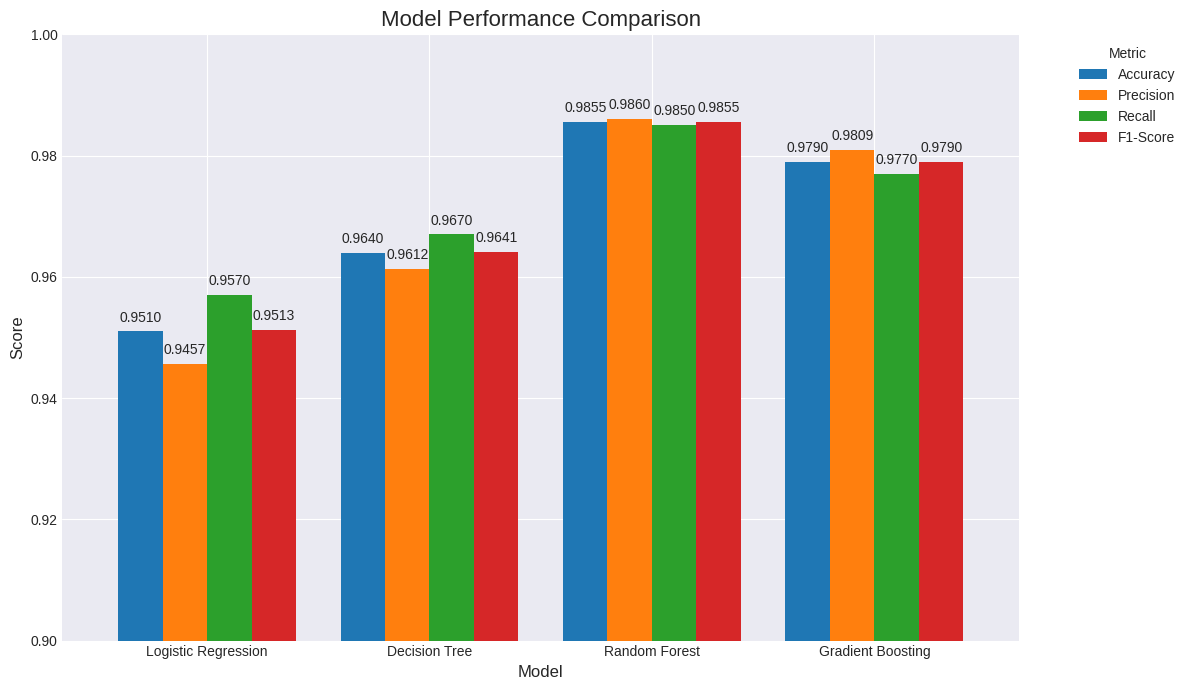

In [36]:
# --- Visualize Model Performance ---
# A bar chart provides a clear visual comparison of the key metrics.

# We will plot the main performance metrics (excluding training time for clarity)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
performance_to_plot = performance_df[metrics_to_plot]

# Set up the plot
plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style for the plot
ax = performance_to_plot.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0, # Keep the model names horizontal
    width=0.8 # Adjust bar width
)

# Set titles and labels for clarity
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.9, 1.0) # Zoom in on the high scores for better visual comparison
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the score values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

# 10. Select and Serialize the Champion Model
Based on the table and visualization, select the best-performing model.
In our case, Random Forest provided the best balance of high performance and speed.

In [ ]:
champion_model = rf_clf # Champion model is now the Random Forest Classifier.
print(f"\nChampion model selected: {type(champion_model).__name__}")

# Now we save our trained champion model to a file using joblib.
# This allows our Streamlit app to load and use the model without retraining.
import joblib

# Create the models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model
joblib.dump(champion_model, 'models/url_model_ds1.joblib')

print("\nChampion model has been serialized to 'models/url_modelds1.joblib'")


Champion model selected: RandomForestClassifier

Champion model has been serialized to 'models/url_model.joblib'


# Explainability with SHAP

---

For the Explainability layer of the model, please see the [XAI Analysis](/xai_analysis.ipynb) Notebook.